In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

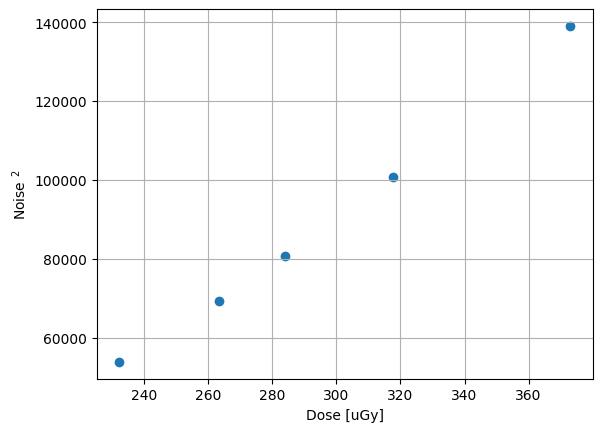

In [3]:
#index in s (1 index sind 500 us), then s in dose (5 uA -> ~50 uGy/s)
#open file
filepath = "C:/Users/lucas/Desktop/Python/sscpraktikum/data/noisestuff.dat"
data = pd.read_csv(filepath, sep = ',')

noise = data['noise']
noise2 = data['noise2']

plt.scatter(noise,noise2)
plt.xlabel('Dose [uGy]')
plt.ylabel('Noise $^2$')
plt.grid(True)
plt.show()

In [4]:
# n2 = A*D +B , D = dose

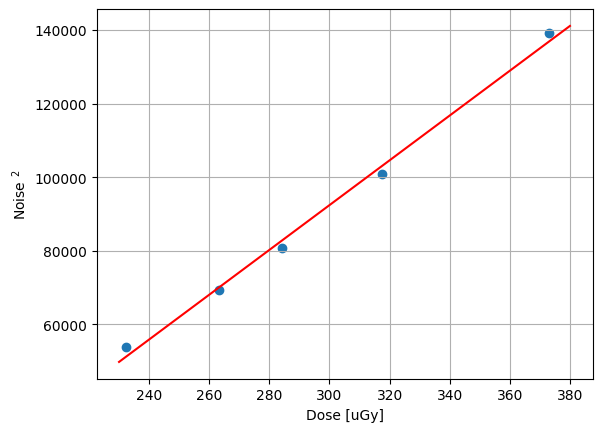

In [5]:
def linear(x,a,b):
    return a*x + b

params_linear, _ = curve_fit(linear,noise,noise2)
fitdose = np.linspace(230, 380, num = 1000)
fitnoise2 = linear(fitdose, *params_linear)

plt.plot(fitdose, fitnoise2, color = "red")
plt.scatter(noise,noise2)
plt.xlabel('Dose [uGy]')
plt.ylabel('Noise $^2$')
plt.grid(True)
plt.show()


In [6]:

print(params_linear)
D_ned = params_linear[1]/params_linear[0] # uGy
print(D_ned)
D_ned = D_ned * 1e6 # pGy
print(D_ned)
n_photon_NED = D_ned * 1 /1.6
print(n_photon_NED) # unit less 


[   608.45598568 -90122.08690482]
-148.11603308336495
-148116033.08336496
-92572520.6771031
